# Implement K-Means Clustering

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

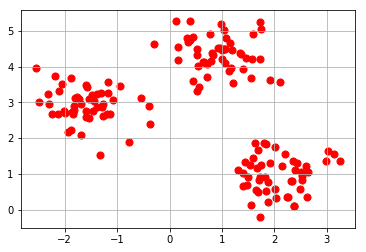

In [22]:
# group size
K = 3

# create random data
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_samples=150,
               n_features=2, 
               centers=K,
               cluster_std=0.5,
               shuffle=True,
               random_state=0)

# show data
plt.scatter(X[:,0], X[:,1], c='red', marker='o', s=50)
plt.grid(); plt.show()

In [14]:
# 1. init center points
def init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

# 2.  grouping
def group_data(X, centers):
    return 0

# 3. Update center points
def update_centers(X, y, k):
    return 0

# kmeans algorithm
def kmeans(X, k):
    centers = init_centers(X, k)
    y = []
    while True:
        # save pre-loop groups
        y_old = y
        # grouping
        y = group_data(X, centers)
        # break while loop if groups are not changed
        if np.array_equal(y, y_old):
            break

        #  update centers
        centers = update_centers(X, y, k)

    return (centers, y)

[[ 1.8706766   0.77797407]
 [-2.49504392  3.01227156]
 [ 2.03562611  0.31361691]]


TypeError: 'int' object has no attribute '__getitem__'

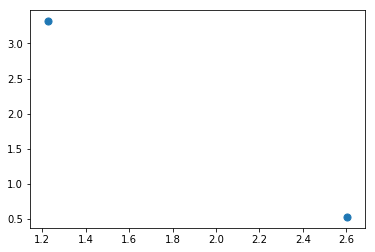

In [16]:
# run k-means
centers, y = kmeans(X, K)

# plot result
for i in range(K):
    plt.scatter(X[y==i,0],
                    X[y==i,1],
                    s=50,
                    #c='lightgreen',
                    #marker='s',
                    label='cluster '+ str(i+1))
 
plt.scatter(centers[:,0],
                    centers[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend(); plt.grid(); plt.show()